# Ford GoBike 2017 ride Analysis
## by Priyadarsini Mylsamy

## Investigation Overview

>The overall goal of the investigation is to study important attributes like user type, age, ride duration, time and day of the ride to understand the rider pattern

## Dataset Overview

> This dataset is about Ford GoBike trip data of about 453159 bike rides from 2017-06-28 to 2017-12-31.It has 11 columns (duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender) and 11 derived columns like Age, Hour of the ride, weekday of the ride etc.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
gobike_df = pd.read_csv('clean_gobike.csv')
customer_df = pd.read_csv('clean_customer.csv')
subscriber_df = pd.read_csv('clean_subscriber.csv')


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Age group of Bike riders

>This histogram shows the distribution of age of bike riders.The histogram shows that the age of most of our riders is between 20 and 40.30- 40 being the peak and it dips after that .

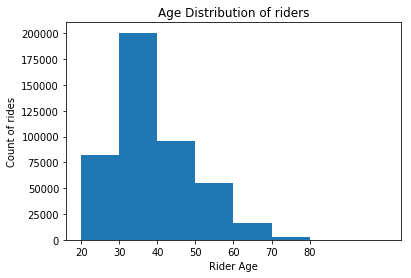

In [4]:
### Let us replot the graph
binsize = 10
bins = np.arange(gobike_df['member_age'].min(), gobike_df['member_age'].max()+binsize, binsize)
plt.hist(data = gobike_df, x = 'member_age', bins = bins);
plt.xlabel('Rider Age')
plt.ylabel('Count of rides')
plt.xticks([20,30,40,50,60,70,80])
plt.title('Age Distribution of riders');

## Duration of rides by user type

> This boxplot visualization shows the duration of bike rides for subscribers and customers for a random sample of 10000 bike rides. Customers clearly spend more time riding than the subscribers.The median ride duration of customers is almost double the median ride duration of a subscriber.This suggestests that most of the customers are tourists who take long trips.Adding gender layer shows us that women tend to ride the bike for longer duration than men and others in both subscriber and customer category

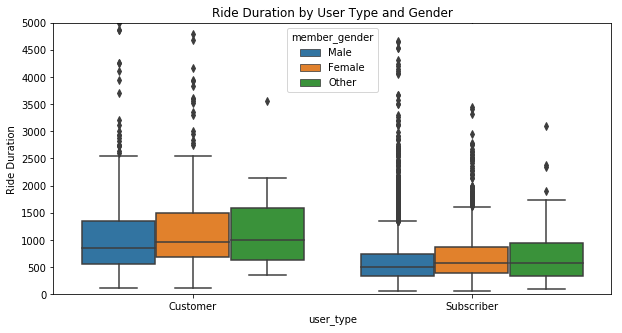

In [6]:
# plot to understand ride duration by customer type by gender
#sample 10000 rides so that plots are clearer and they render faster
samples = np.random.choice(gobike_df.shape[0], 10000, replace = False)
gobike_df_sample = gobike_df.loc[samples,:]

plt.figure(figsize=[10,5])
sb.boxplot(data=gobike_df_sample, x = 'user_type',y= 'duration_sec', hue='member_gender');
plt.ylim(0,5000)
plt.yticks([0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000]);
plt.title('Ride Duration by User Type and Gender')
plt.ylabel('Ride Duration');

## Ride frequency by user type and time of day and day of week

> The below heat map shows the ride duration by weekday and hour for Customers to see if any of those are office commuters and see if they can be converted to subscribers through promotions.
The customer heatmap shows that customers use bikes mainly during weekends, specifically between 12 PM and 4 PM.Saturday 1 PM seems to be the most popular time. Customers do use bikes during weekdays more frequently around 8-9am and 4-6pm with the peak on Thursdays around 5pm.

> The subscriber heatmap shows that the users almost always use the bikes for office commute, given the times of the day of bike usage. Also, the subscriber bike usage is always concentrated to the weekdays, which goes to show that majority of the subscribers do not use bikes for reasons other than for commuting to work.Tueday 8 AM being the peak

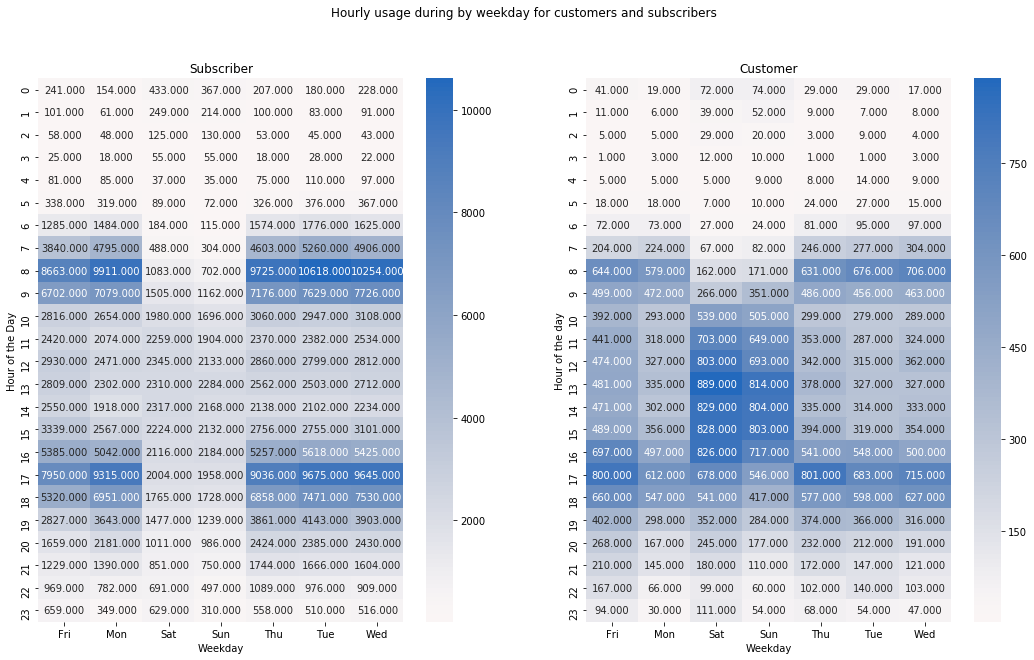

In [7]:
plt.figure(figsize=(18,10))
customer_gobike_df = gobike_df[(gobike_df.user_type=='Customer')]
subscriber_gobike_df = gobike_df[(gobike_df.user_type=='Subscriber')]
plt.suptitle('Hourly usage during by weekday for customers and subscribers')

# heatmap for subscribers
plt.subplot(1, 2, 1)
subscriber_df = subscriber_gobike_df.groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
subscriber_df = subscriber_df.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(subscriber_df, annot = True, fmt = '.3f',
cmap = 'vlag_r',center=0)

plt.title("Subscriber")
plt.xlabel('Weekday')
plt.ylabel('Hour of the Day');

# heatmap for customers
plt.subplot(1, 2, 2)
customer_df = customer_gobike_df.groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
customer_df = customer_df.pivot("start_time_hour", "start_time_weekday", "bike_id")
sb.heatmap(customer_df, annot = True, fmt = '.3f',
cmap = 'vlag_r',center=0)

plt.title("Customer")
plt.xlabel('Weekday')
plt.ylabel('Hour of the day');




> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!